**Advanced Astroinformatics (Semester 1 2024)**

# Plotting TESS light curves

**Advanced Astroinformatics Student Project**

*N. Hernitschek*



---
## Contents
* [Loading light curves](#first-bullet)
* [Plotting light curves](#second-bullet)
* [Plotting light curves in bulk](#third-bullet)
* [Summary](#fourth-bullet)


## 1. Loading Light Curves <a class="anchor" id="second-bullet"></a>

The light curves are available at https://github.com/ninahernitschek/advanced_astroinformatics/releases/download/v1.0/_data.zip

Download it and extract it. It should expand to about 600 MB.

You will find the following subfolders:

`_TESS_lightcurves_raw`

`_TESS_lightcurves_median_after_detrended`

`_TESS_lightcurves_outliercleaned`


and a file `info_tess_data.txt`.


In [ ]:
#This part of the script is used to mount Google Drive in a Colab notebook.
#Since the code is not running in a Colab environment, this part is commented out.

#from google.colab import drive
#drive.mount('/content/drive')

#import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/_data.zip", 'r') as zip_ref:
#    zip_ref.extractall("/content/drive/MyDrive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please open the file `info_tess_data.txt` and a light curve file from any of the folders to familiarize yourself with the data.

## 2. Plotting Light Curves <a class="anchor" id="second-bullet"></a>

The next step is to make plots of those light curves.

We begin with just one light curve.


First, load the light curve:

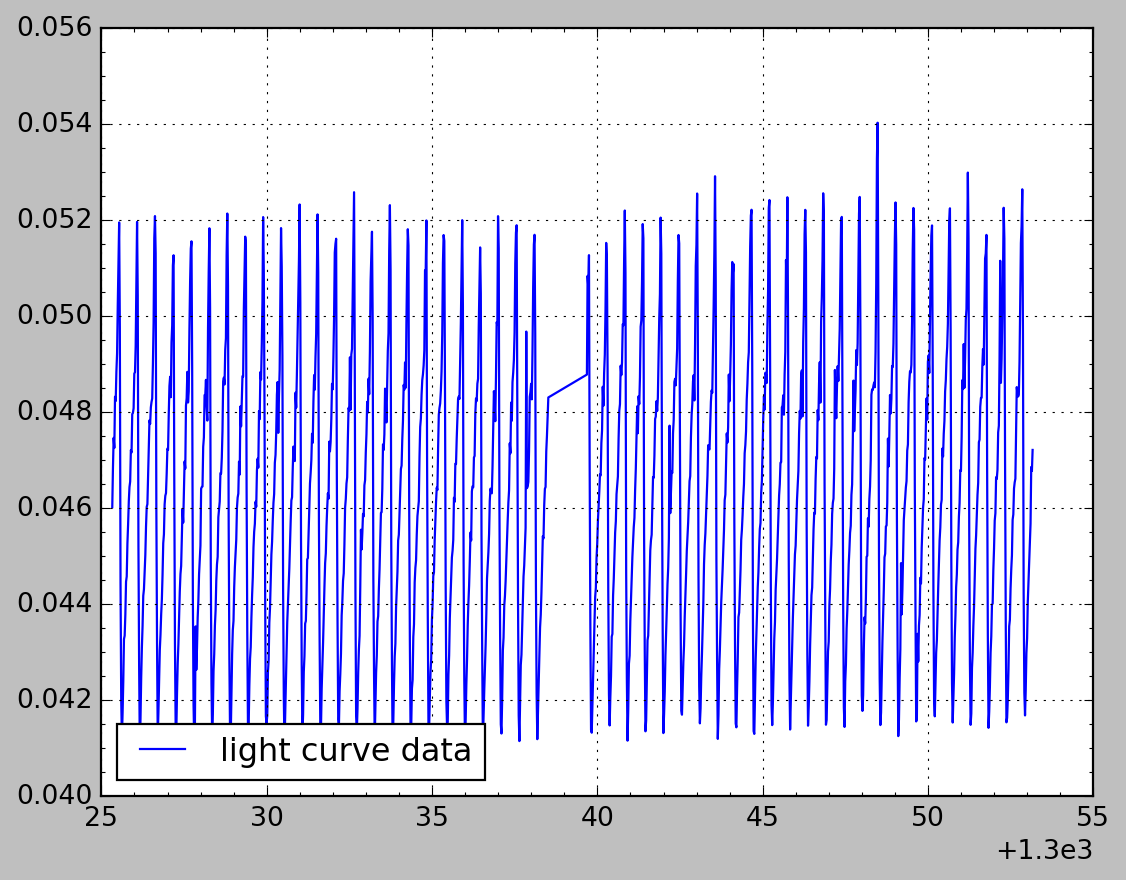

In [314]:


%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from concurrent.futures import as_completed

import math
import glob
import sys
import os

#import matplotlib
#matplotlib.use('PDF')
#import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')


import pandas as pd

#path="/content/drive/MyDrive/"


#data_in = pd.read_csv("41259805_sector01_4_2_cleaned.lc",delim_whitespace=True,
#names = ['time', 'mag', 'magerr'])
path = "/Users/guillermow/Documents/PhD/1st Semester/Advanced Astroinformatics/_data/"
lc_raw=path + '_TESS_lightcurves_raw/'

data_in = pd.read_csv(lc_raw+"RRAB/114920076_sector01_1_1.lc",delim_whitespace=True,
names = ['time', 'mag_clean', 'mag', 'magerr'])


tess_lc = data_in.to_records(index=False)

plt.plot(tess_lc['time'], tess_lc['mag'], label=r'light curve data')

plt.grid(which='major')
plt.legend(loc='lower left');

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)


other ways to read in data: `numpy.loadtxt`

We chose here `pandas` as it will enable us to do a few things more when reading in tables (you will see this later on).

In [ ]:
print(data_in)

             time  mag_clean       mag  magerr
0     1325.328857  18.136438  0.046025     NaN
1     1325.349609  18.145763  0.046839     NaN
2     1325.370483  18.159714  0.047470     NaN
3     1325.391357  18.151997  0.047260     NaN
4     1325.412109  18.176611  0.048327     NaN
...           ...        ...       ...     ...
1277  1353.078491  18.064016  0.045252     NaN
1278  1353.099365  18.089363  0.045683     NaN
1279  1353.120117  18.113430  0.046865     NaN
1280  1353.140991  18.128931  0.046782     NaN
1281  1353.161865  18.137363  0.047219     NaN

[1282 rows x 4 columns]


We now plot this light curve using `matplotlib`.

**Try to figure it out on your own first!**


## 3. Plotting Light Curves in Bulk <a class="anchor" id="third-bullet"></a>


The light curves are organized in folders corresponding to the
VARIABLE STAR TYPE DESIGNATIONS IN VSX:

https://www.aavso.org/vsx/index.php?view=about.vartypes


Modify the plotting code so it plots:
    a) all light curves in a given folder
    b) all light curves in all folders.
    
Hints:
- change line style to plot as points, not as lines
- save the light curves as `*.pdf` files
- give them meaningful file names
- add axis labels and title
- after plotting a few files successfully, you will encounter an error message. Why does this happen?

In [6]:
!pip3 install pathlib


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [362]:
import pathlib
from pathlib import Path
import ipywidgets as widgets
from ipywidgets import interact 

#This contains the general paths of the directories of the cleaned, median after detrained and raw light curves
path = "/Users/guillermow/Documents/PhD/1st Semester/Advanced Astroinformatics/_data/"
lc_median= path + "_TESS_lightcurves_median_after_detrended/"
lc_raw=path + '_TESS_lightcurves_raw/'
lc_cleaned=path + '_TESS_lightcurves_outliercleaned/'
info_tess_data=path + 'info_tess_data.txt'

#This part of the code is used to extract the paths of the files in the directories and store them as strings.
paths_raw = sorted([str(p) for p in Path(lc_raw).iterdir()])
paths_raw = paths_raw[1:] 

paths_median = sorted([str(p) for p in Path(lc_median).iterdir()])
paths_median = paths_median[1:]

paths_cleaned = sorted([str(p) for p in Path(lc_cleaned).iterdir()])
paths_cleaned = paths_cleaned[1:] 
#The first file in the lists contains a .DS_Store file, which has to be erased for the code to work.


suffix_cleaned = np.array([Path(a).name for a in paths_cleaned])
suffix_raw=suffix_cleaned
subtext_median= '_lc_median_after_cbv_detrended_'
suffix_median=np.array([subtext_median + a for a in suffix_raw]) #Since the suffixes of the files in the directories are the same but with an aditional text, 
#it can be simplified by adding the initial subtext along side the common suffixes.

#This part of the code is used to extract the suffixes of the files in the directories and store them as strings to use them later.


In [403]:
#In this line, we can see and select the specifc variable star designation

print(suffix_cleaned)
val = np.where(suffix_cleaned == 'RRC')[0][0] 
print(val)

['ACV' 'CEP' 'DCEP' 'DCEP-FU' 'DCEPS' 'DSCT' 'E' 'EA' 'EB' 'EC' 'ED' 'EW'
 'HADS' 'L' 'ROT' 'RR' 'RRAB' 'RRAB_BL' 'RRC' 'RRD' 'RS' 'SR']
18


In [404]:
pathfiles_median = Path(lc_median+suffix_median[val]) #This part is to select the certain folder for which we'll plot the light curves.
files_median=sorted([p.stem for p in pathfiles_median.rglob("*")])

pathfiles_raw = Path(lc_raw+suffix_raw[val])
files_raw=sorted([p.stem for p in pathfiles_raw.rglob("*")])

pathfiles_cleaned = Path(lc_cleaned+suffix_cleaned[val])
files_cleaned=sorted([p.stem for p in pathfiles_cleaned.rglob("*")])
#This part of the code is used to extract the names of the files in the directories and store them as strings to use them later.

for i in range(len(files_cleaned)):
    if '_cleaned' in files_cleaned[i]:
        files_cleaned[i] = files_cleaned[i].replace('_cleaned', '') #This part of the code is used to remove the -cleaned suffix from the files in the cleaned directory.

common_files = [f for f in files_median if f in files_raw and f in files_cleaned]

del files_median, files_raw, files_cleaned

#Since we want to plot the light curves of specific directories, we need to plot the same light curves in the three directories.
#Therefore, lightcurve A in the cleaned, raw and median directories.
clean=paths_cleaned[val]
raw=paths_raw[val]
median=paths_median[val]

In [405]:
#So, we have the paths for the specific folder and the name of the files in the directories, 
# therefore we can combine it to plot our specific light curves, as seen below in the function we constructed.

def plot_lightcurves(common):
    
    #Since the delim in the folders is different, it's need to take into account when reading the .csv files, alongside the names
    data_clean = pd.read_csv(clean+"/"+common +"_cleaned.lc", names = ['time', 'mag_clean', 'mag', 'magerr'])
    data_raw = pd.read_csv(raw+"/"+common+".lc", delim_whitespace=True ,names = ['time', 'mag_clean', 'mag', 'magerr'])
    data_median = pd.read_csv(median+"/"+common+".lc",delim_whitespace=True, names = ['time', 'mag_clean', 'mag', 'magerr'])
    
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    
    
    ax[2].scatter(data_clean['time'], data_clean['mag'], marker='o', color='k', s=1)
    ax[2].set_title('Cleaned LC')
    ax[2].set_xlabel('Time [BJD - 2457000]')
    ax[2].set_ylabel('Magnitude')
    ax[2].grid(which='major')
    #ax[0].set_aspect('auto')

    ax[0].scatter(data_raw['time'], data_raw['mag'], marker='o', color='k', s=1)
    ax[0].set_title('Raw LC')
    ax[0].set_xlabel('Time [BJD - 2457000]')
    ax[0].set_ylabel('Magnitude')
    ax[0].grid(which='major')
    #ax[1].set_aspect('auto')
    
    ax[1].scatter(data_median['time'], data_median['mag'], marker='o', color='k', s=1)
    ax[1].set_title('Median after Detrented LC')
    ax[1].set_xlabel('Time [BJD - 2457000]')
    ax[1].set_ylabel('Magnitude')
    ax[1].grid(which='major')
    #ax[2].set_aspect('auto')
    
    fig.suptitle('Light Curve:  ' + f'{common}', fontsize=16, fontweight='bold') 
    plt.tight_layout()
    plt.show()
    
    fig2, ax2 = plt.subplots(figsize=(15, 5))
    ax2.scatter(data_clean['time'], data_clean['mag'], marker='o', color='k', s=5, label='Cleaned LC')
    ax2.scatter(data_raw['time'], data_raw['mag'], marker='o', color='r', s=1, label='Raw LC')
    ax2.set_ylim(min(data_clean['mag'])-0.000125, max(data_clean['mag'])+0.000125)
    #ax2.scatter(data_median['time'], data_median['mag'], marker='o', color='b', s=1, label='Median after Detrented LC')
    ax2.legend(loc='best')
    ax2.set_title('All LCs')
    ax2.set_xlabel('Time [BJD - 2457000]')
    ax2.set_ylabel('Magnitude')
    ax2.grid(which='major')
    plt.show()
    #return fig, ax

#We use this widgets add-on to select within the plot the specific light curve we'd want to display from the VSX folders.
lc_set=widgets.Dropdown(
    options=common_files,
    value=common_files[0],
    description='LC of ' + f'{suffix_raw[val]}',
    disabled=False,
)

interact(plot_lightcurves, common=lc_set)

#To save all the respective files, I can just use a "for" of the values of "common" in the function and do a plt.savefig with *.pdf extension
    

interactive(children=(Dropdown(description='LC of RRC', options=('114952185_sector01_1_1', '115044961_sector01…

<function __main__.plot_lightcurves(common)>

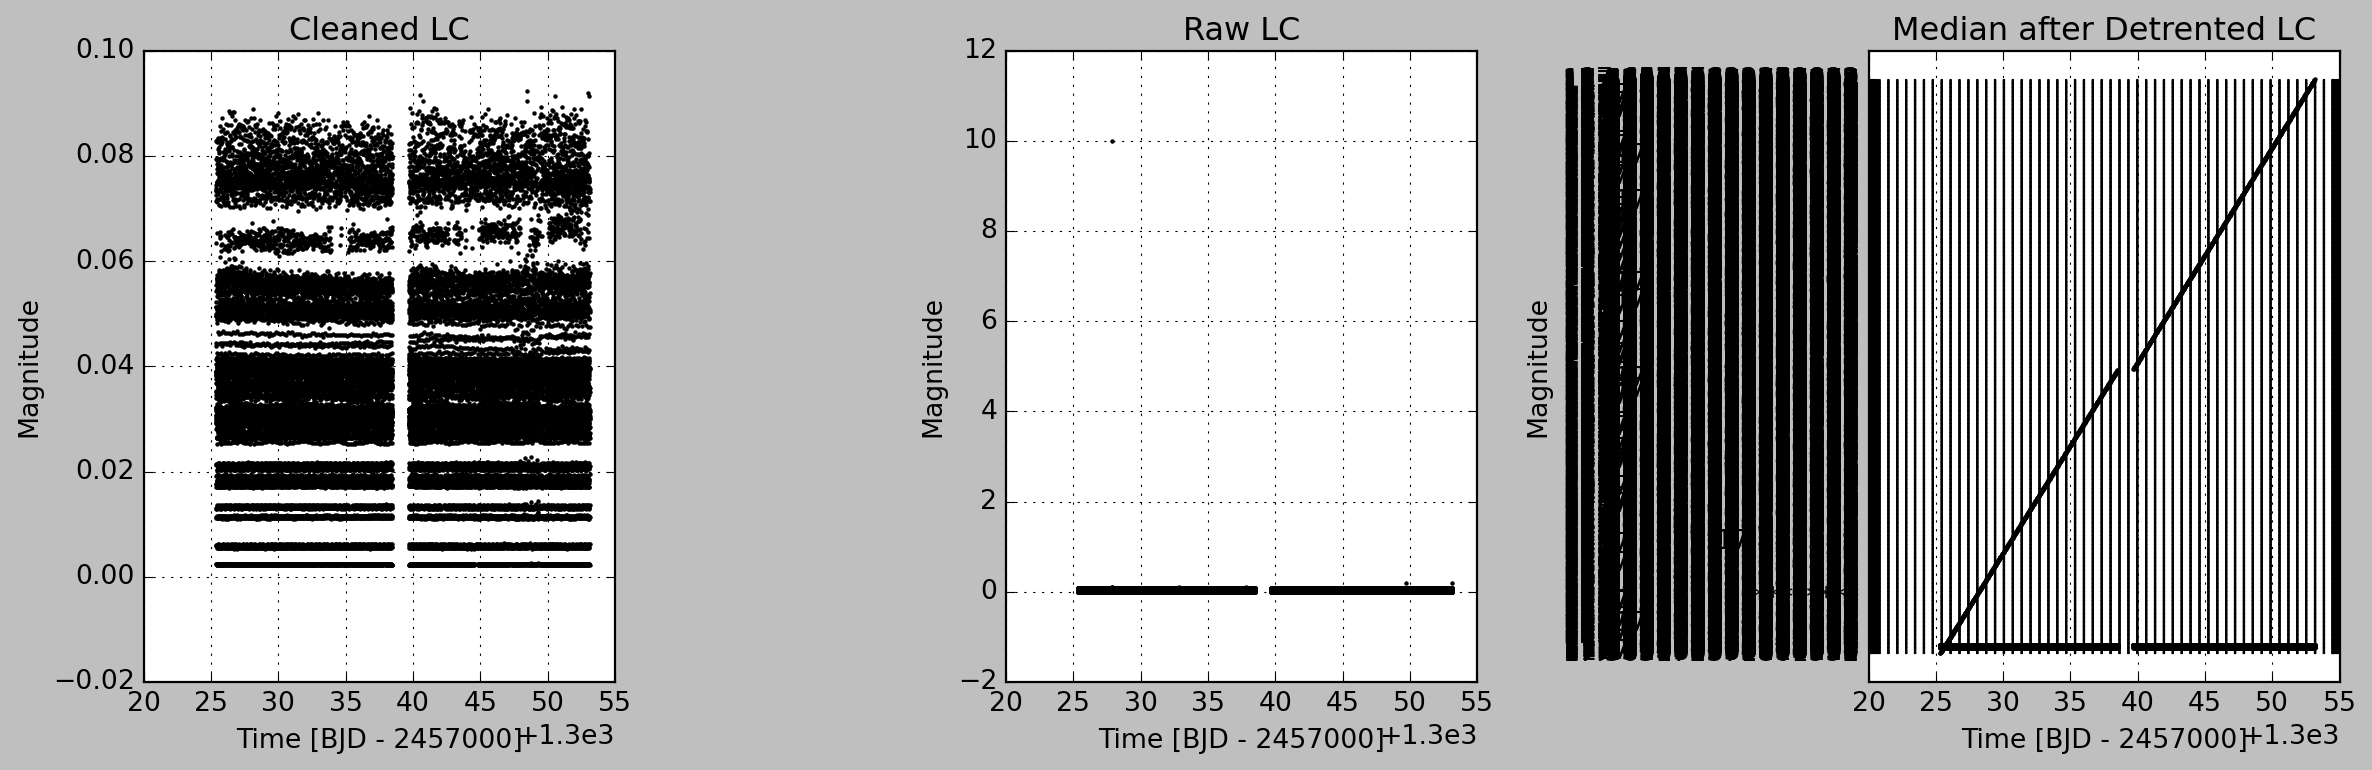

In [ ]:
#This code we'll be used to display all the lightcurves in the specific directory.



def plot_all_lightcurves(clean, raw, median, common):
    #%matplotlib inline
    %config InlineBackend.figure_format='retina'
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    
    for a_path in common:
        data_clean = pd.read_csv(clean+"/"+a_path +"_cleaned.lc", names = ['time', 'mag_clean', 'mag', 'magerr'])
        data_raw = pd.read_csv(raw+"/"+a_path+".lc", delim_whitespace=True ,names = ['time', 'mag_clean', 'mag', 'magerr'])
        data_median = pd.read_csv(median+"/"+a_path+".lc",delim_whitespace=True, names = ['time', 'mag_clean', 'mag', 'magerr'])
        
        #data_clean=data_clean.to_records(index=False)
        #data_raw=data_raw.to_records(index=False)
        #data_median=data_median.to_records(index=False)
        
        ax[0].scatter(data_clean['time'], data_clean['mag'], marker='o', color='k', s=1)
        ax[0].set_title('Cleaned LC')
        ax[0].set_xlabel('Time [BJD - 2457000]')
        ax[0].set_ylabel('Magnitude')
        ax[0].grid(which='major')
        #ax[0].set_aspect('auto')

        ax[1].scatter(data_raw['time'], data_raw['mag'], marker='o', color='k', s=1)
        ax[1].set_title('Raw LC')
        ax[1].set_xlabel('Time [BJD - 2457000]')
        ax[1].set_ylabel('Magnitude')
        ax[1].grid(which='major')
        #ax[1].set_aspect('auto')
        
        ax[2].scatter(data_median['time'], data_median['mag'], marker='o', color='k', s=1)
        ax[2].set_title('Median after Detrented LC')
        ax[2].set_xlabel('Time [BJD - 2457000]')
        ax[2].set_ylabel('Magnitude')
        ax[2].grid(which='major')
        #ax[2].set_aspect('auto')
    
    plt.tight_layout()
    plt.show()


#There's a problem with the Median files scales and data, which is why the plot is out of place in comparison.
plot_all_lightcurves(paths_cleaned[val], paths_raw[val], paths_median[val], common_files)
    

**Your tasks until next week:**

Modify the plotting code to plot three panels for each light curve: raw, median after CBV, outlier cleaned.

If you have more time, look up variable star types on the VSX website.

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, you should have:
* seen how to open tables (i.e.: light curves) in Python
* plotted light curves in Python using `matplotlib`
* removed `NaN` values from light curves.